In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns


# from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import probplot
import gc
import matplotlib
# from pyod.models.ecod import ECOD
# import ppscore as pps

# # Build the Regression / Regressor models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# import os
import datetime
from datetime import datetime as datet
from scipy.stats import ttest_ind
import warnings
from pickle import dump, load
# from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
mp.style.use('fivethirtyeight')

C:\Users\vivek\anaconda4\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("data.csv")
X_train, X_test, Y_train, Y_test = train_test_split(data.drop("Bankrupt?", axis=1), data["Bankrupt?"], random_state=104, test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train.head()

(5455, 95)
(1364, 95)
(5455,)
(1364,)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4135,0.577682,0.621838,0.611168,0.603951,0.604008,0.999054,0.797496,0.809387,0.303533,0.781651,8.210000e+09,1.260000e+09,0.463800,0.000759,0.271485,0.221482,0.221482,0.221482,0.293372,0.335396,0.205696,0.184431,0.258567,0.022129,0.848060,0.689520,0.689520,0.217607,8.410000e+09,0.000589,0.264492,0.392636,0.008601,0.006081,0.630986,0.014883,0.183693,0.816307,0.005494,0.377054,0.005366,0.184385,0.254928,0.415244,0.374813,0.001230,0.005146,1.864873e-04,1.333706e-03,0.126452,0.038841,0.403971,0.004566,0.816580,0.595631,0.799740,0.180776,0.006211,0.005538,0.173118,0.347189,0.277450,6.525451e-03,0.900575,0.739072,0.338160,0.002195,0.951389,0.002423,0.039130,8.470000e+09,6.510000e+09,0.593935,5.800000e+09,0.671580,0.159769,0.900575,0.338160,0.115256,0.674526,0.463683,0.603254,0.322292,0.033819,0,0.840192,0.001452,0.623752,0.603946,0.845415,0.285573,0.026883,0.565562,1,0.019120
1201,0.471506,0.532272,0.524653,0.604852,0.604974,0.998999,0.797295,0.809226,0.303295,0.781477,1.519464e-04,3.800000e+09,0.462807,0.000606,0.000000,0.154018,0.154018,0.154018,0.208188,0.321285,0.015896,0.098038,0.165022,0.022053,0.847962,0.686829,0.686829,0.217293,6.400000e+09,0.000404,0.263763,0.382046,0.003863,0.001115,0.677422,0.023482,0.213683,0.786317,0.004943,0.396741,0.006249,0.098059,0.164045,0.407889,0.064468,0.001493,0.004233,2.790000e+09,5.670000

In [3]:
data.shape

(6819, 96)

In [4]:
data["Bankrupt?"].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [5]:
# Function to get basic column statistics
def get_column_info(data, col):
    return {
        'Column Name': col,
        'Num Unique Values': data[col].nunique(),
        'DType': data[col].dtypes,
        'Null Values': data[col].isna().sum(),
        'Skew': data[col].skew(),
        'Kurtosis': data[col].kurtosis()
    }

# Function to categorize columns by type
def categorize_columns(data, unique_val_threshold, num_to_cat_threshold):
    cat_cols = []
    num_cols = []
    cat_cols_num_val = []
    date_time_cols = []

    for col in data.columns:
        if data[col].dtypes == 'object':
            cat_cols.append(col)
        elif data[col].dtypes in ['int64', 'float64']:
            if data[col].nunique() <= num_to_cat_threshold:
                cat_cols_num_val.append(col)
            else:
                num_cols.append(col)
        elif data[col].dtypes == 'datetime64[ns]':
            date_time_cols.append(col)

        # Display columns with unique values less than the threshold
        if data[col].nunique() <= unique_val_threshold:
            print(f"{col} has {data[col].nunique()} unique values: {data[col].unique()}")
            print("----------------------------------------------------------------------------")
    
    return cat_cols, num_cols, cat_cols_num_val, date_time_cols

# Function to display summary of duplicate rows
def display_duplicates(data, target_var):
    dups = data.drop([target_var], axis=1).duplicated().sum()
    print(f"Total number of Duplicates: {dups}")
    print("\n--------------------------------------------------------\n")

# Main data quality function
def data_quality(data, target_var, unique_val_threshold=20, num_to_cat_threshold=20):
    print(f"Shape: {data.shape[0]} rows & {data.shape[1]} cols")
    print("\n--------------------------------------------------------\n")

    # Get data info
    data_info = pd.DataFrame([get_column_info(data, col) for col in data.columns])
    
    # Categorize columns
    cat_cols, num_cols, cat_cols_num_val, date_time_cols = categorize_columns(data, unique_val_threshold, num_to_cat_threshold)
    
    # Display duplicates information
    display_duplicates(data, target_var)
    
    # Print the categorized columns
    print(f"Categorical Columns:\n {cat_cols}\n")
    print(f"Numerical Columns:\n {num_cols}\n")
    print(f"Categorical Columns with Numerical Values:\n {cat_cols_num_val}\n")
    print(f"Date Time Columns:\n {date_time_cols}\n")
    print("\n--------------------------------------------------------\n")
    
    return data_info, cat_cols, num_cols, cat_cols_num_val, date_time_cols


In [6]:
data_info, cat_cols, num_cols, cat_col_num_val, date_time_cols = data_quality(data, "Bankrupt?")

Shape: 6819 rows & 96 cols

--------------------------------------------------------

Bankrupt? has 2 unique values: [1 0]
----------------------------------------------------------------------------
 Liability-Assets Flag has 2 unique values: [0 1]
----------------------------------------------------------------------------
 Net Income Flag has 1 unique values: [1]
----------------------------------------------------------------------------
Total number of Duplicates: 0

--------------------------------------------------------

Categorical Columns:
 []

Numerical Columns:
 [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate'

In [7]:
data_info

,Column Name,Num Unique Values,DType,Null Values,Skew,Kurtosis
0,Bankrupt?,2,int64,0,5.295388,26.048769
1,ROA(C) before interest and depreciation befor...,3333,float64,0,-0.323941,6.390770
2,ROA(A) before interest and % after tax,3151,float64,0,-1.033727,9.038785
3,ROA(B) before interest and depreciation after...,3160,float64,0,-0.763564,7.929074
4,Operating Gross Margin,3781,float64,0,-8.043368,365.540671
5,Realized Sales Gross Margin,3788,float64,0,-8.066572,367.041830
6,Operating Profit Rate,3376,float64,0,-70.237164,5210.086057
7,Pre-tax net Interest Rate,3789,float64,0,-52.482867,3053.033349
8,After-tax net Interest Rate,3604,float64,0,-52.995744,3029.115791
9,Non-industry income and expenditure/revenue,2551,float64,0,39.641689,2649.428722


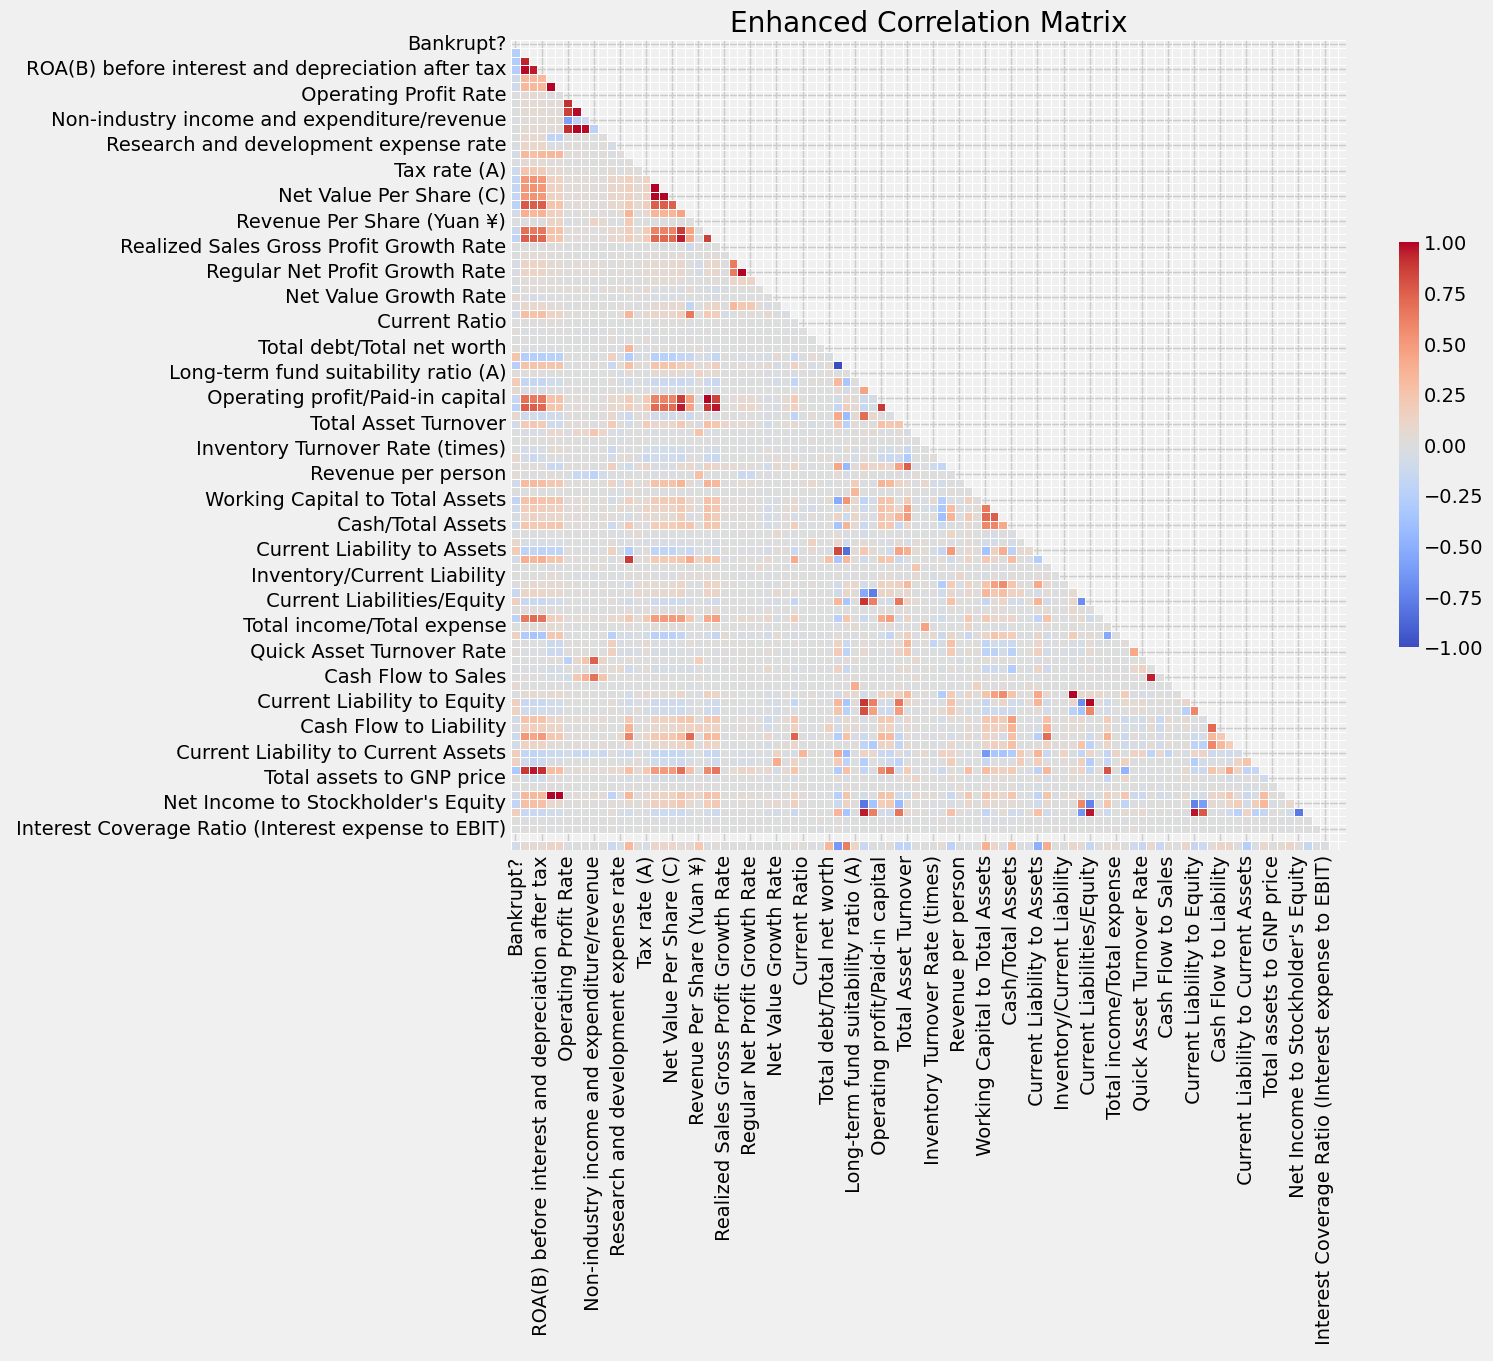

Features to consider dropping (correlation > 0.85): [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth

In [8]:
# Function to calculate correlation matrix
def calculate_correlation(data):
    """
    Calculate the correlation matrix for the given DataFrame.
    """
    return data.corr()

# Function to create a mask for the upper triangle
def create_upper_triangle_mask(corr_matrix):
    """
    Create a mask for the upper triangle of a correlation matrix.
    This prevents redundant correlations from being displayed on the heatmap.
    """
    return np.triu(np.ones_like(corr_matrix, dtype=bool))

# Function to plot the heatmap of the correlation matrix
def plot_correlation_heatmap(corr_matrix, mask, figsize=(12, 10), palette="coolwarm", title="Correlation Matrix Plot"):
    """
    Plot a heatmap of the correlation matrix with a mask for the upper triangle.

    Parameters:
    - corr_matrix: DataFrame of the correlation matrix.
    - mask: Mask for the upper triangle to hide redundant correlations.
    - figsize: Tuple to set the figure size.
    - palette: String to set the color palette of the heatmap.
    - title: String to set the title of the heatmap.
    """
    fig, ax = mp.subplots(figsize=figsize)
    sns.heatmap(corr_matrix, mask=mask, cmap=sns.color_palette(palette, as_cmap=True), center=0,
                linewidths=0.7, cbar_kws={"shrink": .5})
    mp.title(title)
    mp.show()

# Function to remove highly correlated features based on a threshold
def remove_highly_correlated_features(corr_matrix, threshold=0.9):
    """
    Remove features from the dataset that have a correlation higher than the threshold.
    
    Parameters:
    - corr_matrix: DataFrame of the correlation matrix.
    - threshold: Float representing the correlation threshold to remove highly correlated features.
    
    Returns:
    - to_drop: List of column names that are highly correlated and can be dropped.
    """
    to_drop = [col for col in corr_matrix.columns if any(corr_matrix[col] > threshold) and col != corr_matrix.columns[0]]
    return to_drop

# Main function to run the analysis
def run_correlation_analysis(data, threshold=0.9, figsize=(12, 10), palette="coolwarm", title="Correlation Matrix Plot"):
    """
    Run the correlation analysis: calculate correlation, create a mask, and plot a heatmap.
    Optionally remove highly correlated features.

    Parameters:
    - data: DataFrame of the dataset.
    - threshold: Correlation threshold to remove highly correlated features.
    - figsize: Size of the figure for the heatmap.
    - palette: Color palette for the heatmap.
    - title: Title for the heatmap plot.
    """
    # Step 1: Calculate correlation matrix
    corr_matrix = calculate_correlation(data)

    # Step 2: Create mask for upper triangle
    mask = create_upper_triangle_mask(corr_matrix)

    # Step 3: Plot the heatmap
    plot_correlation_heatmap(corr_matrix, mask, figsize=figsize, palette=palette, title=title)

    # Step 4: Optionally remove highly correlated features
    to_drop = remove_highly_correlated_features(corr_matrix, threshold=threshold)
    
    if to_drop:
        print(f"Features to consider dropping (correlation > {threshold}): {to_drop}")
    else:
        print(f"No features found with correlation higher than {threshold}.")
    
    return to_drop

# Example of running the analysis
to_drop = run_correlation_analysis(data, threshold=0.85, title="Enhanced Correlation Matrix")


In [9]:
import pandas as pd
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures
from sklearn.pipeline import Pipeline

# Drop columns with only 1 unique value
X, y = data.drop(["Bankrupt?"], axis=1), data["Bankrupt?"]
X.drop(X.columns[X.nunique() == 1], axis=1, inplace=True)

# Define pipeline
pipeline = Pipeline(steps=[
    ('Constant', DropConstantFeatures()),
    ('Correlated', DropCorrelatedFeatures())
])

# Apply pipeline transformations
X_train_after_pipeline = pipeline.fit_transform(X_train)
print(X_train_after_pipeline.shape)

# Get the remaining feature names
ftr_engine_cols = list(X_train_after_pipeline.columns)


(5455, 69)


In [10]:
X_train = X_train_after_pipeline
print(X_train.shape)

(5455, 69)


In [11]:
def encode_categorical(X):
    X_encoded = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X_encoded[colname], _ = X_encoded[colname].factorize()
    return X_encoded

def get_discrete_features(X):
    return [pd.api.types.is_integer_dtype(t) for t in X.dtypes]

def compute_mi_scores(X, y):
    X_encoded = encode_categorical(X)
    discrete_features = get_discrete_features(X_encoded)
    mi_scores = mutual_info_regression(X_encoded, y, discrete_features=discrete_features, random_state=0)
    return pd.Series(mi_scores, name="MI Scores", index=X_encoded.columns).sort_values(ascending=False)

In [12]:
mi_cols = compute_mi_scores(X_train, Y_train)
mi_selected_cols = mi_cols.loc[mi_cols >= 0.03].index.tolist()
mi_selected_cols


[' Net profit before tax/Paid-in capital',
 ' Borrowing dependency',
 ' Net Income to Total Assets',
 ' Total income/Total expense',
 ' Equity to Liability',
 ' Interest Expense Ratio',
 ' Retained Earnings to Total Assets',
 ' Net Value Per Share (A)',
 ' Degree of Financial Leverage (DFL)',
 ' Interest Coverage Ratio (Interest expense to EBIT)']

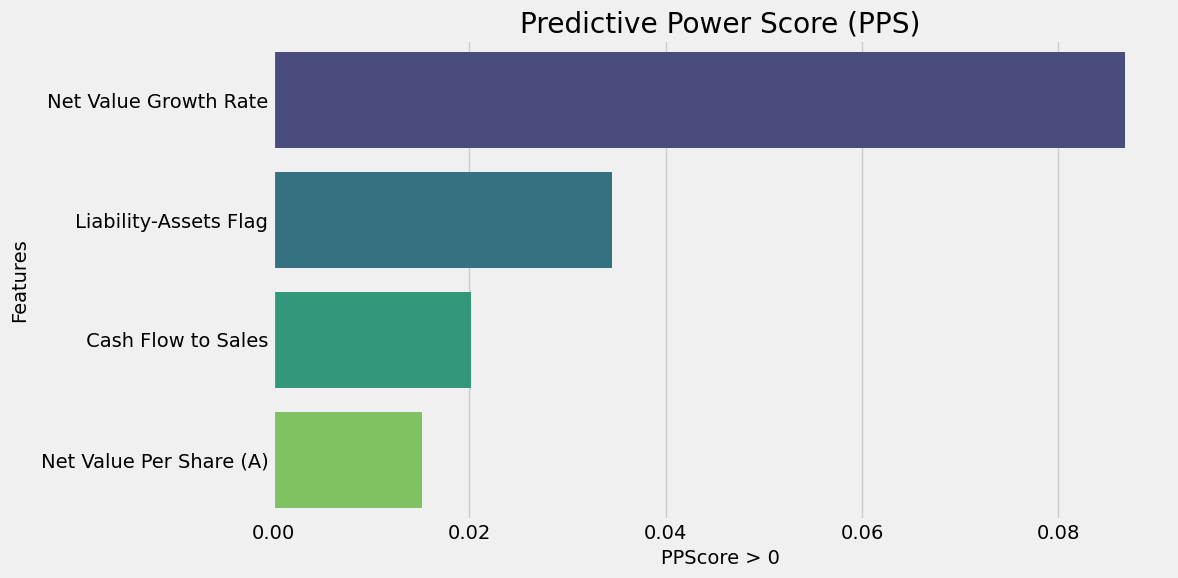

In [13]:
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate PPS
pps_input_df = X_train.copy()
pps_input_df['Bankrupt'] = Y_train.astype(str)
pps_df = pps.predictors(pps_input_df, y="Bankrupt")
pps_df = pps_df[pps_df.ppscore > 0]

# Plot PPS
plt.figure(figsize=(12, 6))
sns.barplot(data=pps_df, x="ppscore", y="x", palette="viridis")
plt.xlabel("PPScore > 0")
plt.ylabel("Features")
plt.title("Predictive Power Score (PPS)")
plt.tight_layout()
plt.show()


In [14]:
X_train.head()

,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (A),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
4135,0.809387,0.303533,8.210000e+09,1.260000e+09,0.463800,0.000759,0.271485,0.221482,0.335396,0.205696,0.022129,0.848060,0.689520,0.217607,8.410000e+09,0.000589,0.264492,0.392636,0.008601,0.006081,0.630986,0.014883,0.005494,0.377054,0.005366,0.254928,0.415244,0.374813,0.001230,0.005146,1.864873e-04,1.333706e-03,0.126452,0.038841,0.403971,0.004566,0.816580,0.595631,0.799740,0.180776,0.006211,0.005538,0.173118,0.277450,6.525451e-03,0.900575,0.739072,0.002195,0.951389,0.002423,0.039130,8.470000e+09,6.510000e+09,5.800000e+09,0.671580,0.159769,0.674526,0.463683,0.603254,0.322292,0.033819,0,0.840192,0.001452,0.623752,0.603946,0.026883,0.565562,0.019120
1201,0.809226,0.303295,1.519464e-04,3.800000e+09,0.462807,0.000606,0.000000,0.154018,0.321285,0.015896,0.022053,0.847962,0.686829,0.217293,6.400000e+09,0.000404,0.263763,0.382046,0.003863,0.001115,0.677422,0.023482,0.004943,0.396741,0.006249,0.164045,0.407889,0.064468,0.001493,0.004233,2.790000e+09,5.670000e+09,0.031613,0.011856,0.393467,0.028055,0.703911,0.100899,0.334637,0.026045,0.001100,0.000882,0.156617,0.276273,7.489831e-03,0.699262,0.725075,0.019561,0.917793,0.002160,0.020707,2.062784e-04,6.060000e+09,4.380000e+09,0.671580,0.614007,0.648615,0.459959,0.585198,0.316452,0.072609,0,0.787439,0.006939,0.621895,0.604851,0.025226,0.580666,0.015884
2496,0.807894,0.301557,7.370000e+08,0.000000e+00,0.458980,0.000465,0.000000,0.113354,0.314388,0.003312,0.022193,0.848106,0.689456,0.217599,6.120000e+09,0.000331,0.264111,0.375424,0.002554,0.002278,0.625583,0.121797,0.004984,0.514239,0.005366,0.151029,0.393715,0.007496,0.062632,0.000101,3.451830e-02,3.780000e+08,0.017742,0.020340,0.370729,0.621377,0.741420,0.021722,0.020835,0.023749,0.002691,0.006758,0.018212,0.276974,6.440000e+08,0.049582,0.726599,1.000000,0.912139,0.001891,0.009499,1.280960e-04,1.401099e-04,3.165289e-04,0.671639,1.000000,0.649390,0.459877,0.560380,0.323143,0.106007,0,0.777094,0.387361,0.623852,0.578164,0.026053,0.553494,0.011326
4118,0.809330,0.303460,8.220000e+09,1.710000e+09,0.462313,0.000658,0.085839,0.176689,0.320896,0.050819,0.022110,0.848026,0.689277,0.217588,8.080000e+09,0.000456,0.26

In [15]:
selected_features_final = pps_df.x.tolist()
selected_features_final

[' Net Value Growth Rate',
 ' Liability-Assets Flag',
 ' Cash Flow to Sales',
 ' Net Value Per Share (A)']

Starting the training with RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters based on Randomized Search: {'n_estimators': 100, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}
Best F1 Score from CV: 0.3



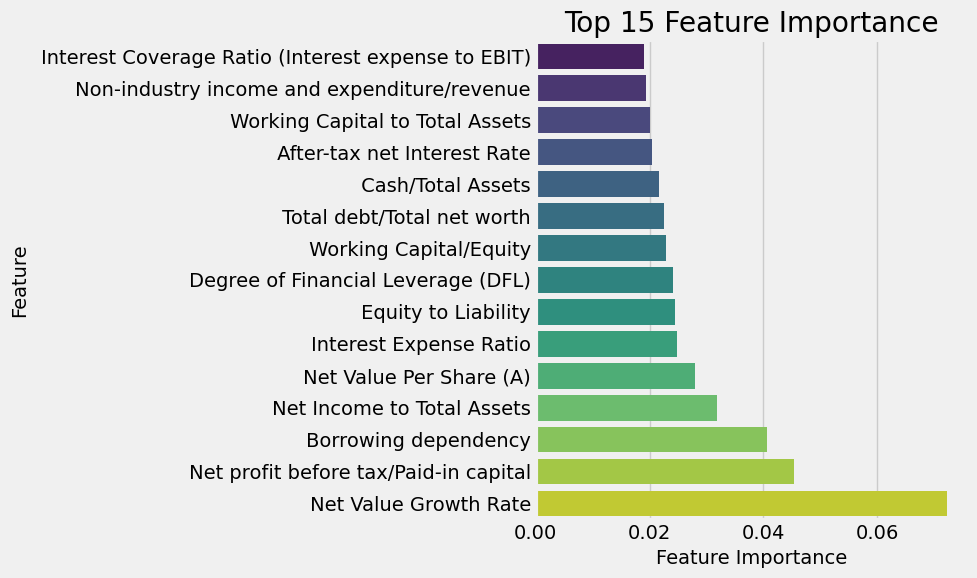

In [16]:
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

top_n_req = 15

# Define a reduced set of hyperparameters for faster tuning
rf_param = {
    'n_estimators': [100, 150, 200, 250, 300],  # Number of trees
    'criterion': ['gini', 'entropy'],           # Split criteria
    'max_depth': [5, 10, 15, 20, 25, 30, 35],   # Depth of trees
    'min_samples_split': [2, 5, 10],            # Minimum samples for splitting
    'max_features': ['sqrt', 'log2']            # Features considered for split
}

# RandomizedSearchCV with limited iterations and 5-fold cross-validation
print("Starting the training with RandomizedSearchCV...")
rf_for_feature_selection = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_for_feature_selection, 
    param_distributions=rf_param, 
    scoring='f1', 
    n_iter=20,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    verbose=1,
    random_state=42
)

random_search.fit(X_train, Y_train)

# Display best hyperparameters and CV score
print("Best parameters based on Randomized Search:", random_search.best_params_)
print(f"Best F1 Score from CV: {round(random_search.best_score_, 2)}\n")

# Get the best model and feature importances
best_rf_model = random_search.best_estimator_
feature_importances = best_rf_model.feature_importances_
feature_names = best_rf_model.feature_names_in_

# Get the indices of the top n features
top_n_indices = np.argsort(feature_importances)[-top_n_req:]

# Create DataFrame for feature importances
feature_importance_rf = pd.DataFrame({
    'Feature': [feature_names[i] for i in top_n_indices],
    'Importance': feature_importances[top_n_indices]
})

# Plot top n features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n_req} Feature Importance")
plt.tight_layout()
plt.show()
